In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\lwang\OneDrive - Vrije Universiteit Brussel\Desktop\2025 VISION\SKILLS UPGRADE 2025\MIGRATION GOVERNANCE\data\Cleaned_Asylum_Data.csv"
df = pd.read_csv(file_path)

# Step 2: Quick check of structure
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# Step 3: Ensure year and application values are numeric
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["applications"] = pd.to_numeric(df["applications"], errors="coerce")

# Step 4: Drop regional aggregates (like EU27_2020 if not already done)
df = df[df["geo"] != "EU27_2020"]

# OPTIONAL: Save cleaned version (for backup)
# df.to_csv("Cleaned_Asylum_Data_Processed.csv", index=False)

# Now you're ready for all visualizations & analyses!


Shape: (1176, 10)
Columns: ['Unnamed: 0', 'freq', 'citizen', 'sex', 'unit', 'age', 'asyl_app', 'geo', 'year', 'applications']
   Unnamed: 0 freq        citizen sex unit    age asyl_app geo  year  \
0           0    A  EXT_EU27_2020   T  PER  TOTAL  ASY_APP  AT  2013   
1           1    A  EXT_EU27_2020   T  PER  TOTAL  ASY_APP  BE  2013   
2           2    A  EXT_EU27_2020   T  PER  TOTAL  ASY_APP  BG  2013   
3           3    A  EXT_EU27_2020   T  PER  TOTAL  ASY_APP  CH  2013   
4           4    A  EXT_EU27_2020   T  PER  TOTAL  ASY_APP  CY  2013   

   applications  
0       17500.0  
1       21030.0  
2        7145.0  
3       21305.0  
4        1255.0  


C:\Users\lwang\AppData\Local\Temp\ipykernel_5000\2056408734.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="applications", y="geo", palette="viridis")


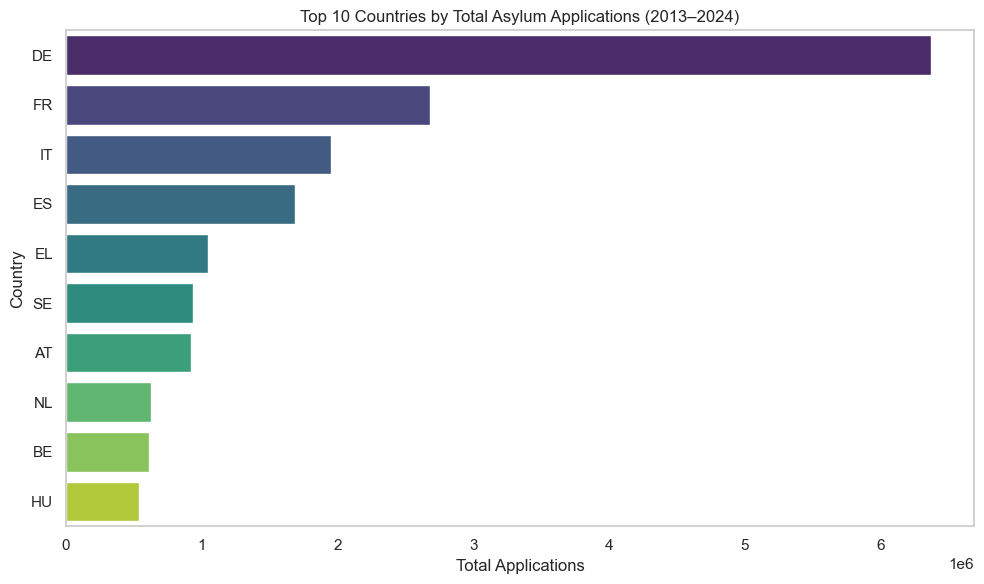

In [51]:
# Group by country and sum all applications
top_countries = (
    df.groupby("geo")["applications"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Filter main dataframe to include only top 10 countries
df_top = df[df["geo"].isin(top_countries["geo"])]

# Bar chart
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x="applications", y="geo", palette="viridis")
plt.title("Top 10 Countries by Total Asylum Applications (2013–2024)")
plt.xlabel("Total Applications")
plt.ylabel("Country")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


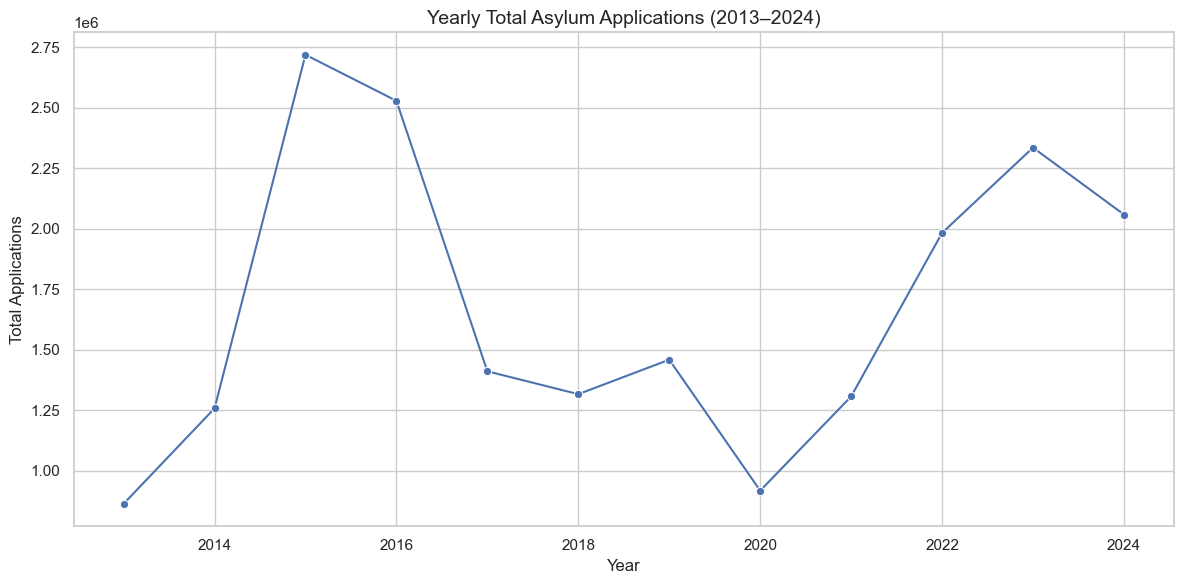

In [52]:
# Group by year and sum all applications
yearly_trend = (
    df.groupby("year")["applications"]
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x="year", y="applications", marker="o")
plt.title("Yearly Total Asylum Applications (2013–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Applications")
plt.grid(True)
plt.tight_layout()
plt.show()


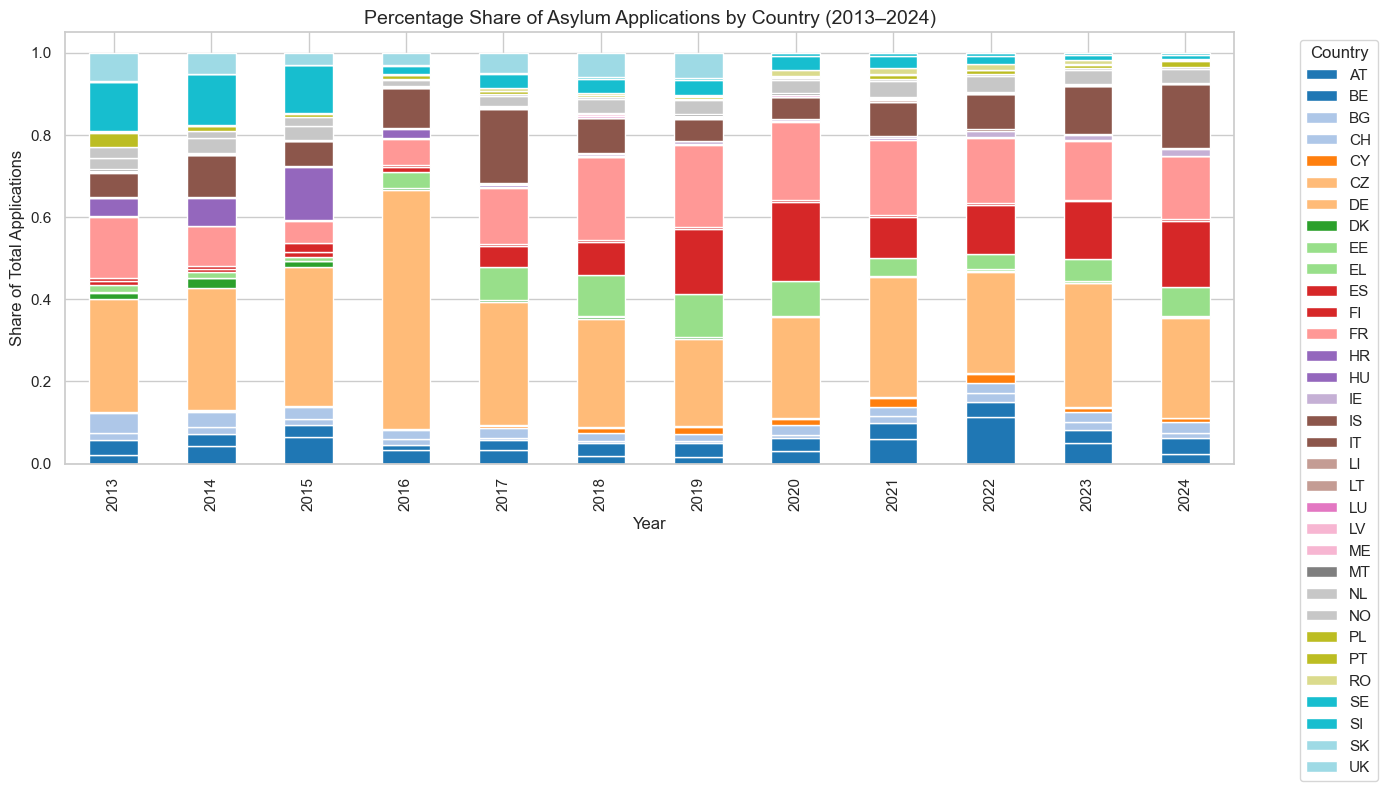

In [54]:
# 1. Filter out EU27_2020 and group data
df_filtered = df[df["geo"] != "EU27_2020"]

# 2. Group and normalize to get percentage shares per year
grouped = df_filtered.groupby(["year", "geo"])["applications"].sum()
pct_share = grouped.groupby(level=0).transform(lambda x: x / x.sum())
pct_df = grouped.reset_index(name="applications_pct")
pct_df["applications_pct"] = pct_share.values

# 3. Pivot for stacked bar plot
pivot_pct = pct_df.pivot(index="year", columns="geo", values="applications_pct")

# 4. Plot the percentage stacked bar chart
pivot_pct.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")
plt.title("Percentage Share of Asylum Applications by Country (2013–2024)", fontsize=14)
plt.ylabel("Share of Total Applications")
plt.xlabel("Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
